In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_44/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


[<img src="https://www.digitalhouse.com/ar/logo-DH.png" width="400" height="200" align='right'>](http://digitalhouse.com.ar/)

# CHEKPOINT - Descenso del Gradiente

En este checkpoint veremos cómo implementar el método del descenso del gradiente en Python para una regresión lineal simple. Este método de optimización es uno de los más utilizados en machine learning y comprender su funcionamiento es clave para entender cómo se llevan a cabo el entrenamiento de los modelos.

El Algoritmo de Descenso del gradiente, que es utilizado por varios modelos para minimizar la **funcion de costo J(θ)**, y como consecuencia encontrar los parámetros que minimiza el error de predicción.


## Funcionamiento del Algoritmo de Descenso del Gradiente

Como indicamos, este algoritmo permite permite optimizar los modelos predictivos buscando minimizar la funcion de costo J(θ). Esto lo hace ajustando gradual y sucesivamente los parametros del modelo de forma que con cada nuevo ajuste logra reducir el valor de J(θ) hasta finalmente alcanzar el mínimo más próximo. Este puede ser tanto un mínimo local como global, ya que este algoritmo no los puede diferenciar.  

Para identificar el mínimo de la función el método del descenso del gradiente calcula la derivada parcial de la funcion de costo J(θ) respecto a cada parámetro del modelo en el punto de evaluación. La derivada indica el valor y sentido en que se encuentra el minimo mas cercano. 
El resultado de la derivada se le resta a cada uno de los parámetros multiplicado por la velocidad de aprendizaje (α). La velocidad de aprendizaje generalmente tiene un valor entre 0 y 1 e indica lo rápido que converge el algoritmo. Es importante notar que es necesario seleccionar un valor adecuado. Un valor demasiado bajo puede provocar que el algoritmo sea muy lento. Por otro lado, un valor lo demasiado alto podría saltarse el mínimo y no llegar a converger nunca.


En resumen, los pasos que realiza el algoritmo de descenso del gradiente son los siguiente:

1) Inicializar los parámetros θ a un valor de inicio  
2) Indicar la velocidad de aprendizaje del algoritmo (α)  
3) Obtener la derivada de J en el punto θ  
4) Sustraer la derivada por la velocidad de aprendizaje al valor actual del parámetro  
5) Actualizar el valor de θ con el nuevo valor  
6) Comprobar el cambio en la actualización de los parámetros es inferior a un fijado previamente (llamada criterio de parada).  
7) En caso afirmativo finalizar la ejecución, en caso contrario volver al punto 3.

Si usamos como ejemplo un modelo de regresion simple, con solo una variable predictiva y una varaible target; tendremos que la ecuacion de la recta se puede escribir como:

$$\widehat{y} = b_{0} + b_{1}*x$$  

la funcion de costo que utilizaremos es:

$$J_{\Theta}= \frac{1}{2N}\sum_{1}^{N}(\widehat{y}^{(i)}-y^{(i)})^{2}$$  

$$J_{\Theta}= \frac{1}{2N}\sum_{1}^{N}((b_{0} + b_{1}*x^{(i)})-y^{(i)})^{2}$$  

y se puede demostrar que sus derivadas parciales son:

$$\frac{\partial }{\partial b_{0}} J_{(b0,b1)}= \frac{1}{N}\sum_{1}^{N}((b_{0} + b_{1}*x^{(i)})-y^{(i)})$$  

$$\frac{\partial }{\partial b_{1}} J_{(b0,b1)}= \frac{1}{N}\sum_{1}^{N}((b_{0} + b_{1}*x^{(i)})-y^{(i)})*x^{(i)}$$  


A continuación desarrollaremos un algoritmo de descenso de gradiente en python, siguiendo los los pasos mencionados anteriormente y aplicando las fórmulas recien enunciadas.

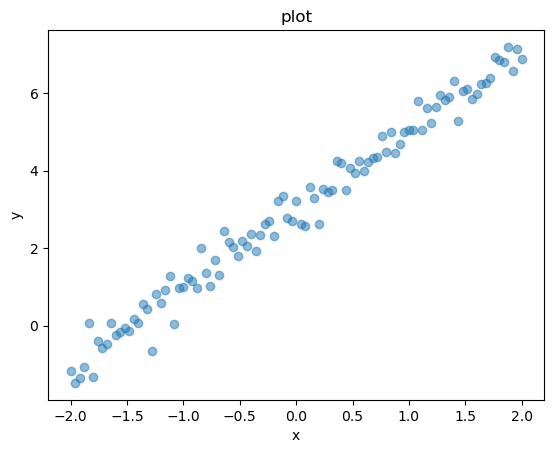

In [2]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

# Creación de un conjunto de datos para entrenamiento
X = np.linspace(-2, 2, 101)
y = 3 + 2 * X + np.random.randn(*X.shape) * 0.33


# Plot
plt.scatter(X, y, alpha=0.5)
plt.title('plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
# Creamos la funcion de Descenso del gradiente.


def descenso_del_gradiente(X,y,num_steps = 100,learningRate = 0.10,criteria = 1e-5):
    """
    Toma como parametros la variable predicora X y la variable target.
    Se establece como parametros opcionales:
    num_steps: que define la cantidad máxima de saltos como un criterio de salida
    learning_rate: define la velocidad de aprendizaje
    criteria: define un segundo criterio de salida cuando el error es inferior a ese valor.
    """
    
    b_0 = 1
    b_1 = 1
    
    # en esta variable vamos a almacenar el MSE de la corrida anterior para luego calcular 
    # cuanto se redujo el error en un salto de gradiente.
    mse_previo = 0
    
    # Proceso iterativo como máximo realiza num_steps loops.
    for step in range(0, num_steps):
        
        #luego de inicializar los parametros calulamos el MSE actual para esos parametros
        mse_actual = metrics.mean_squared_error(y,  b_0 + b_1*X)
        
        # Plot
        plt.figure(figsize=(8,4))
        plt.scatter(X, y, alpha=0.5)
        plt.plot(X, b_0 + b_1*X)
        plt.title('step: ' + str(step+1))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.text(3, 6, "b0  = " + str(b_0))
        plt.text(3, 5, "b1  = " + str(b_1))
        plt.text(3, 4, "MSE = " + str(mse_actual))
        if step > 0:
            plt.text(3, 3, "reduccion del MSE = " + str(round(100*(mse_previo-mse_actual)/mse_previo,4))+"%")
        plt.show()
                  
        
                     
        b_0_gradient = 0
        b_1_gradient = 0
        N = len(X)
        
        for i in range(0, len(X)):
            b_0_gradient -= (2.0/N) * (y[i] - (b_0 + b_1 * X[i]))
            b_1_gradient -= (2.0/N) * (y[i] - (b_0 + b_1 * X[i])) * X[i]

        b_0 = b_0 - (learningRate * b_0_gradient)
        b_1 = b_1 - (learningRate * b_1_gradient)
        
        # almaceno el valor de MSE para comparar en el próximo salto
        mse_previo = mse_actual
                
        #verifico criterio de parada 
        if max(abs(learningRate * b_0_gradient), abs(learningRate * b_1_gradient)) < criteria:
            break
    
    
    return

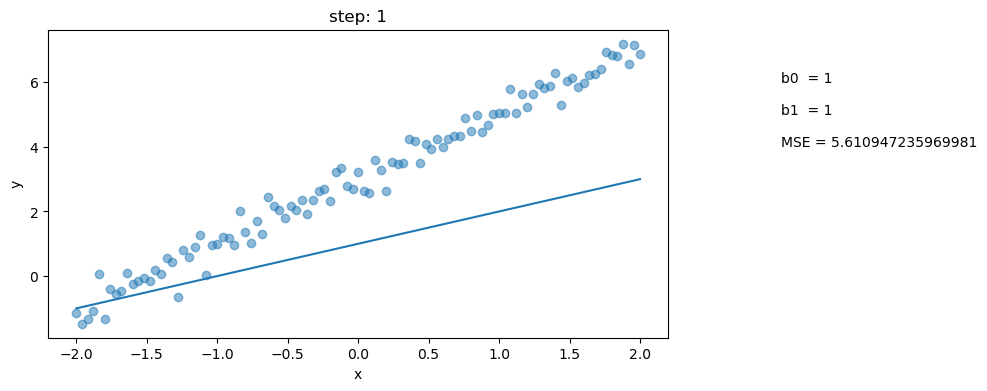

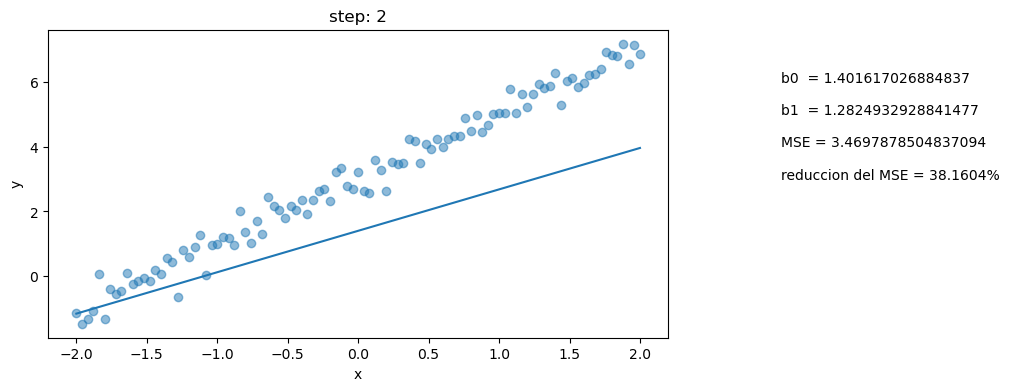

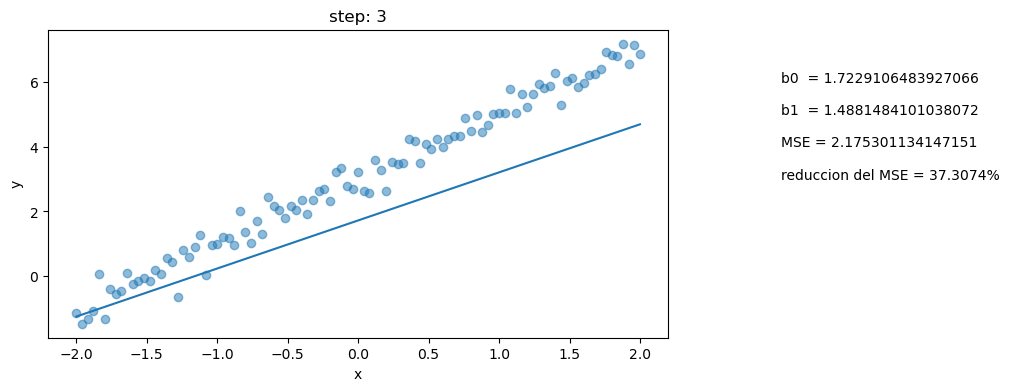

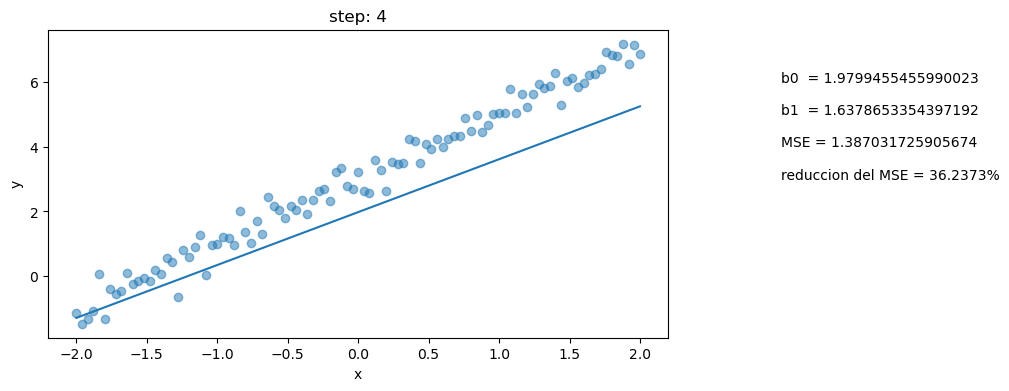

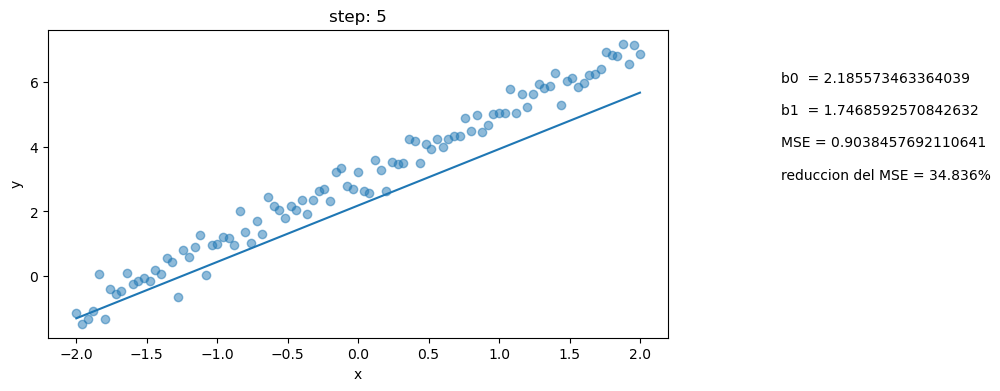

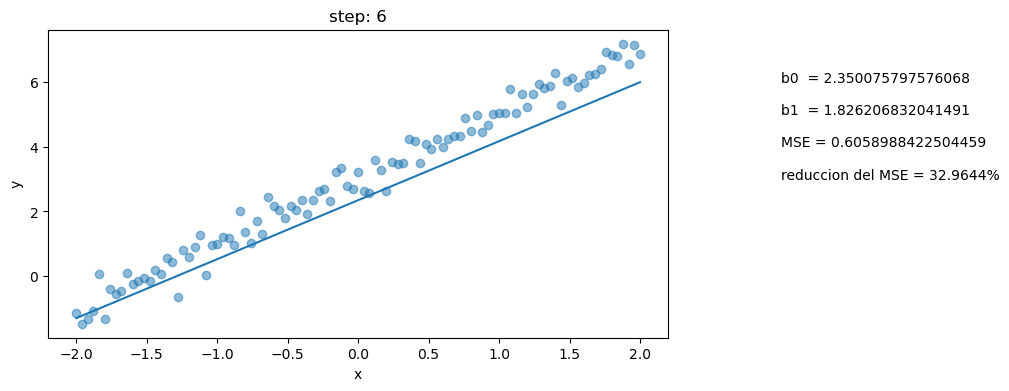

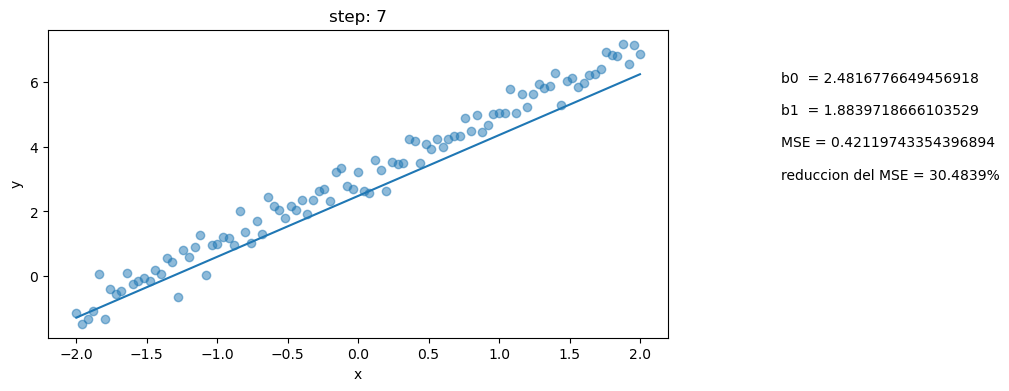

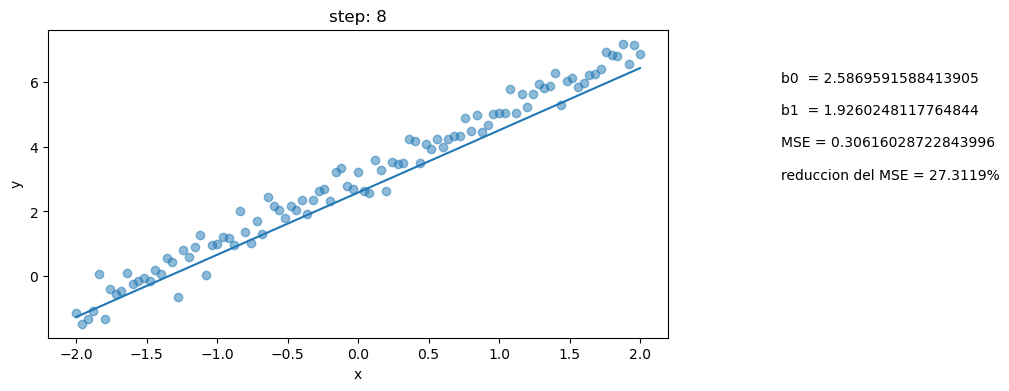

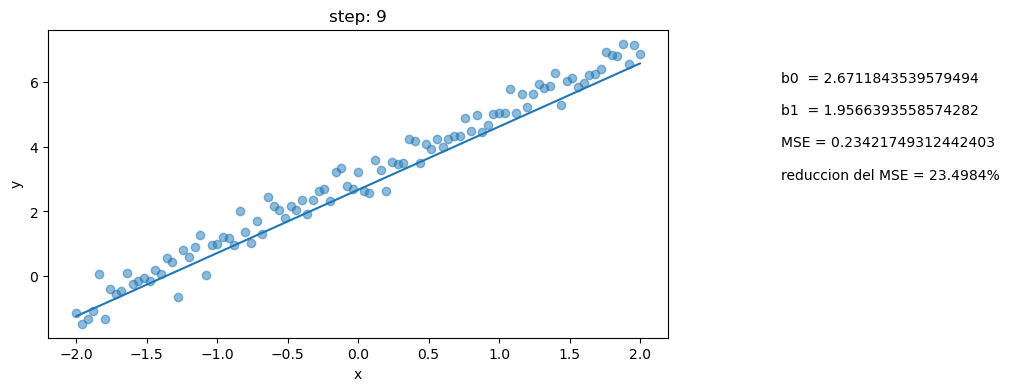

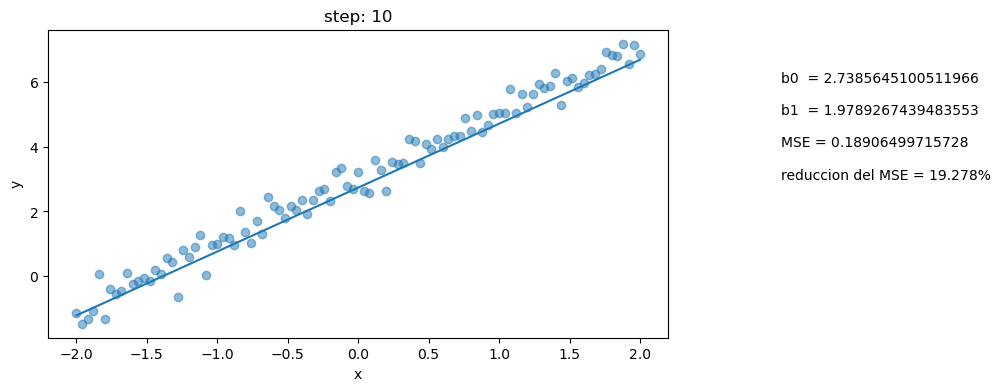

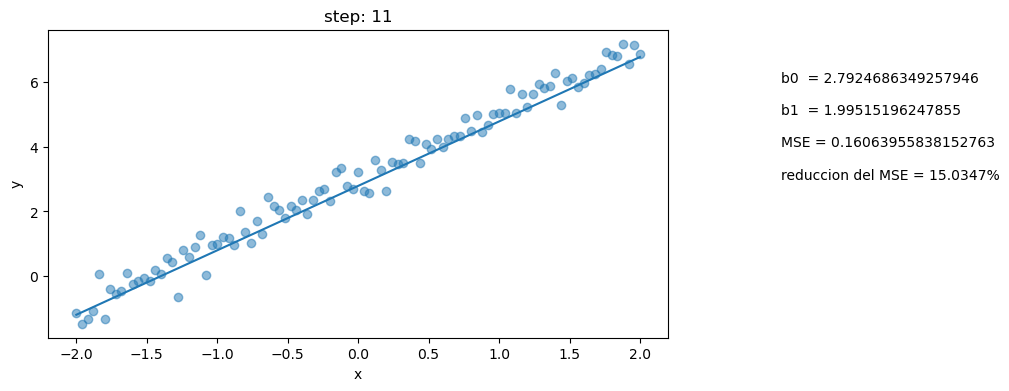

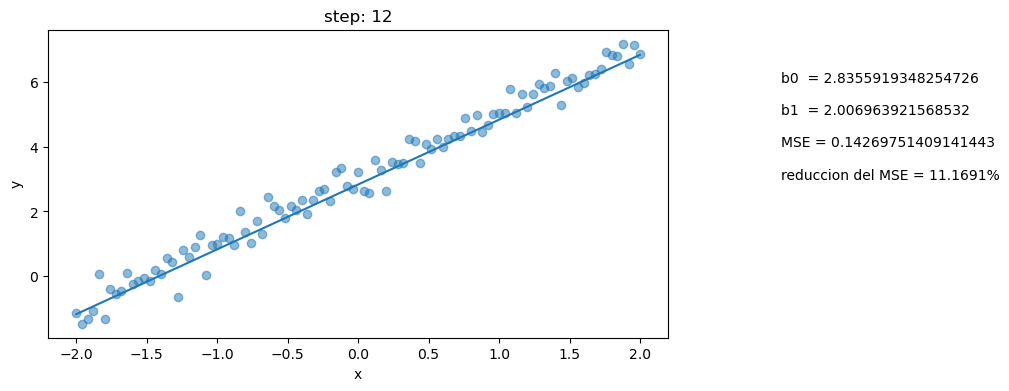

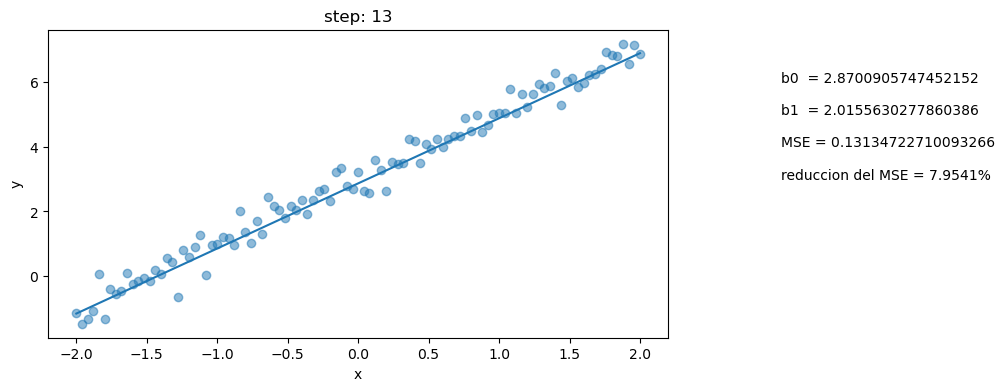

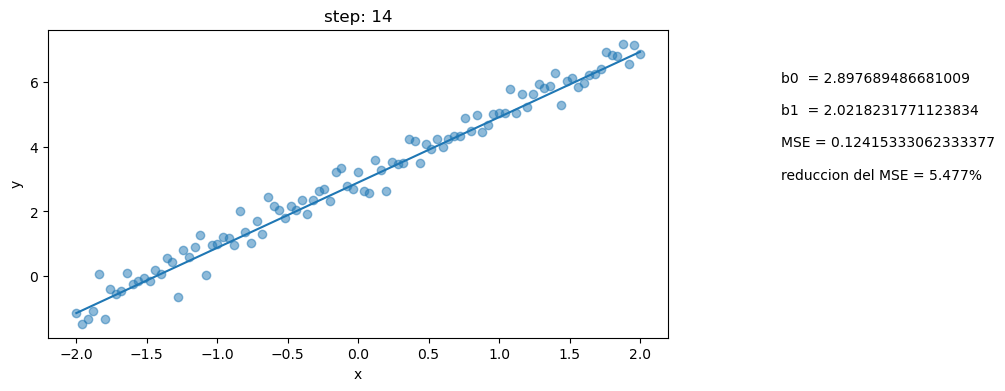

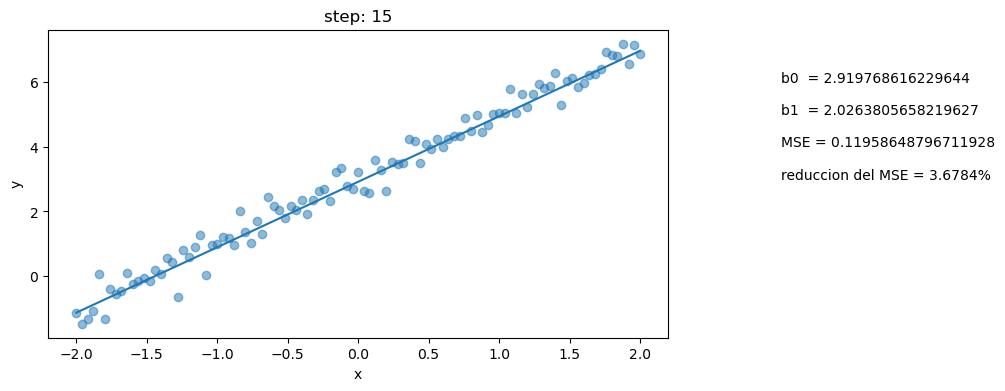

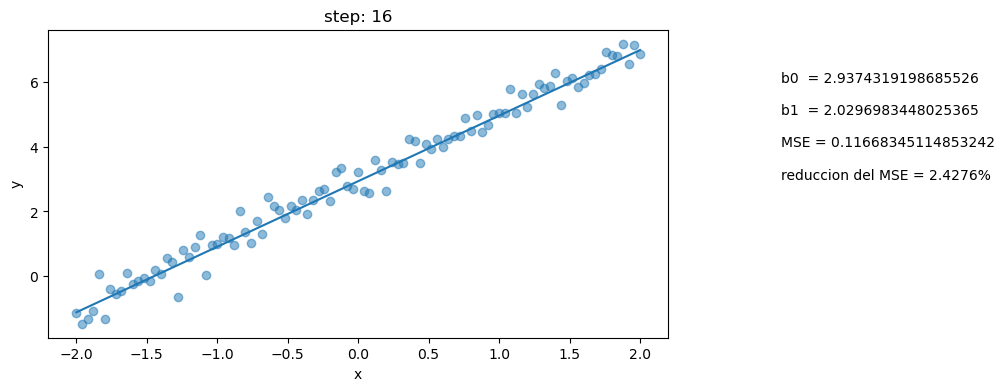

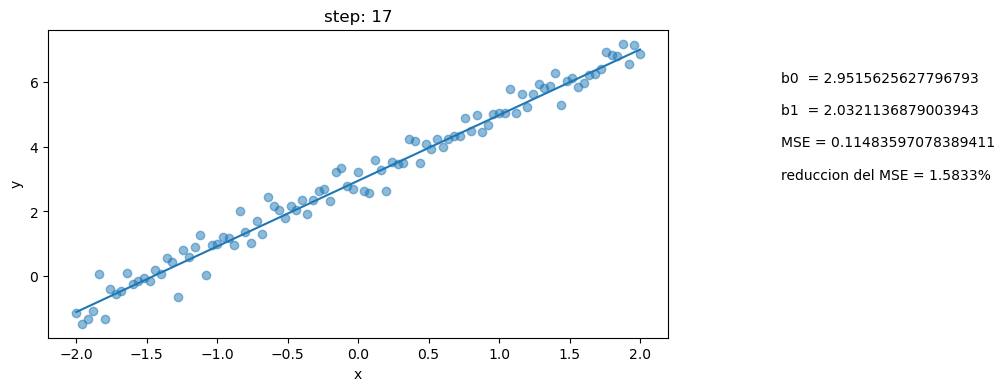

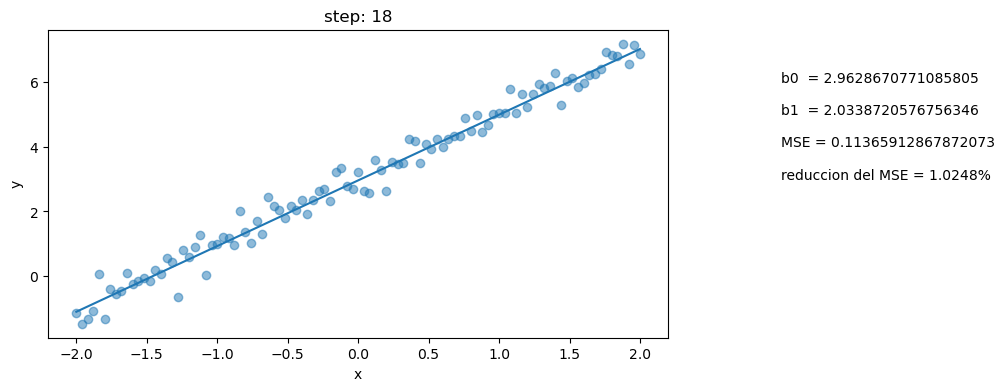

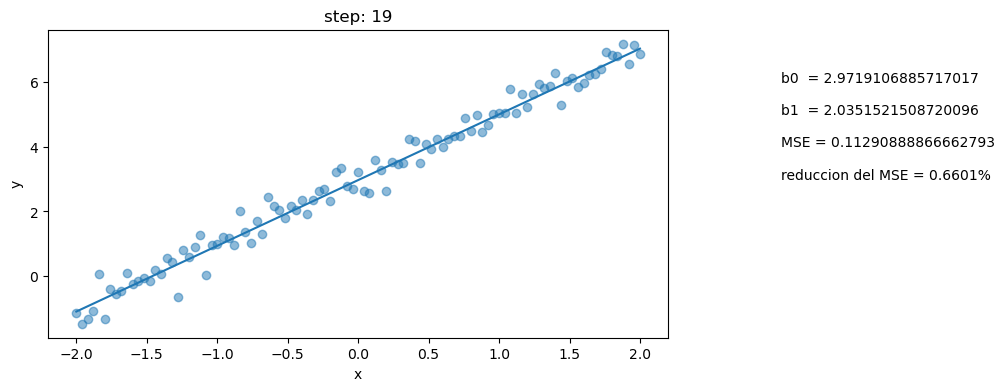

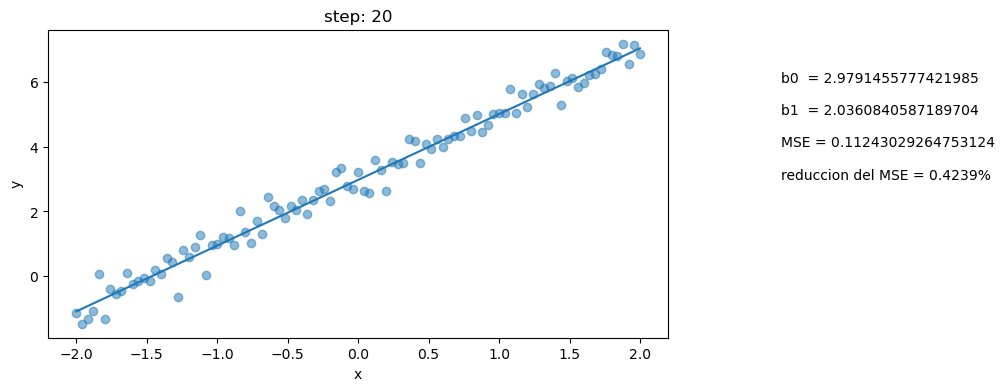

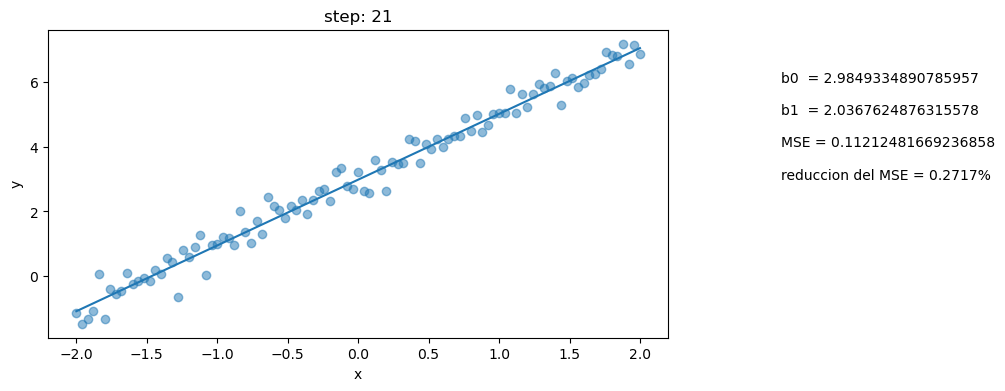

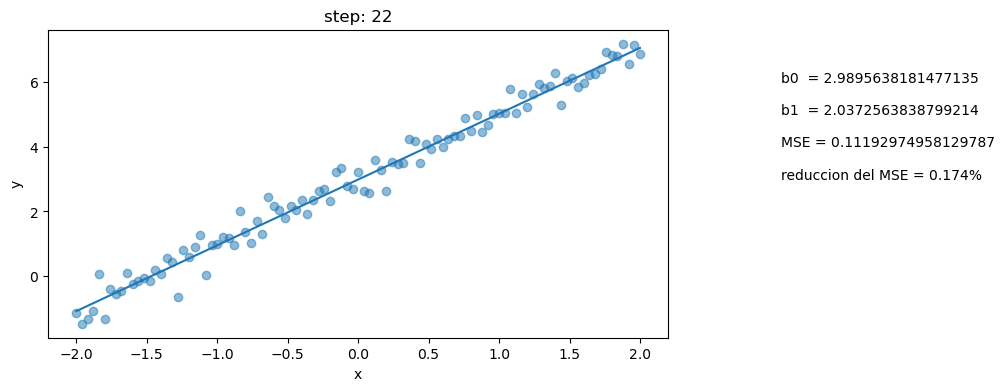

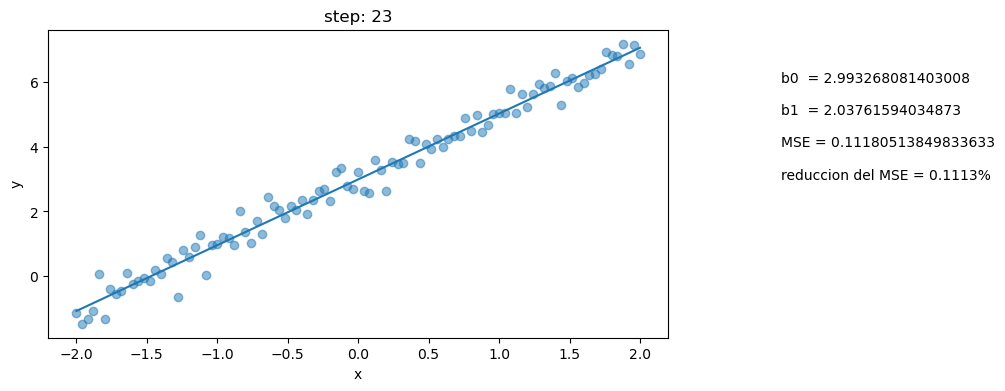

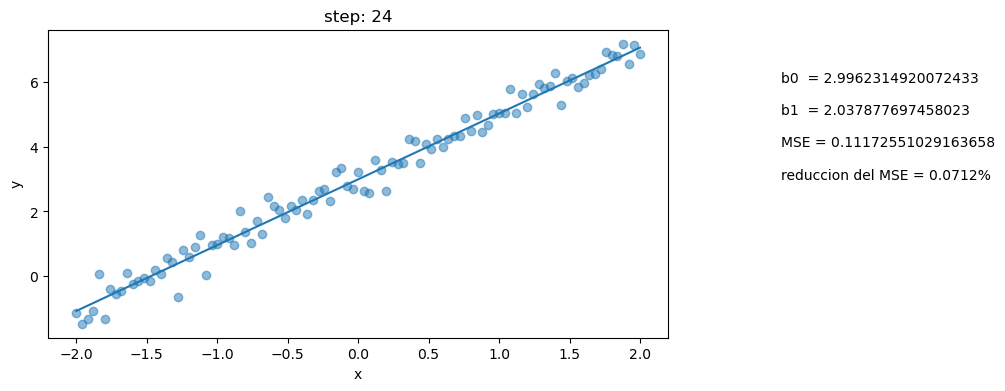

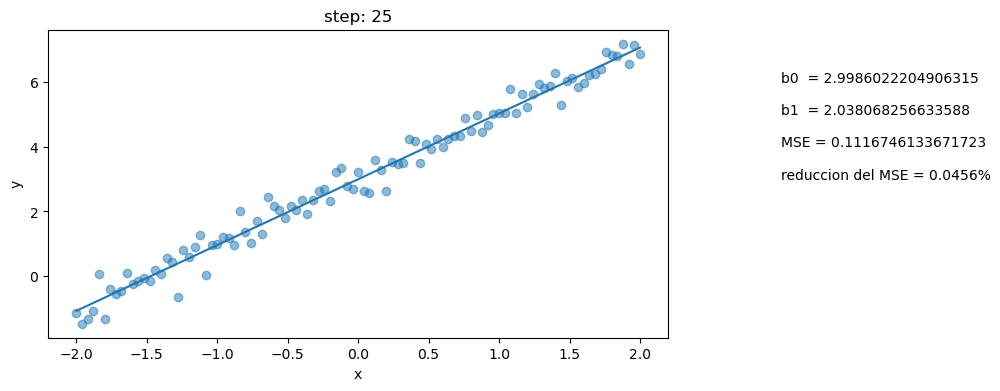

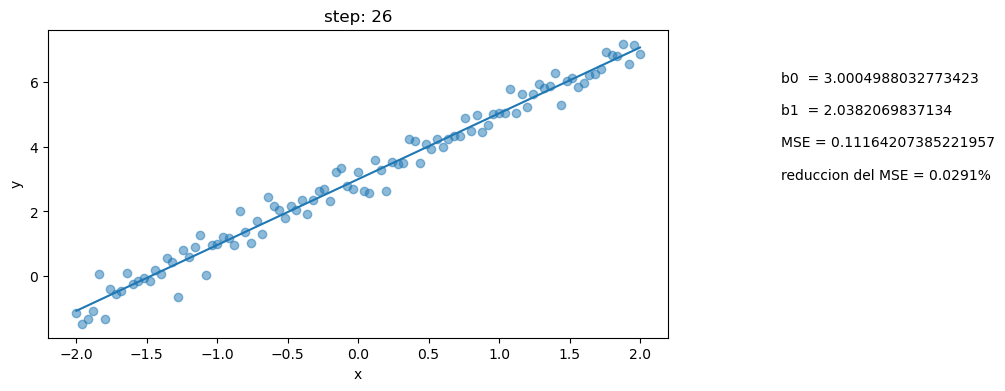

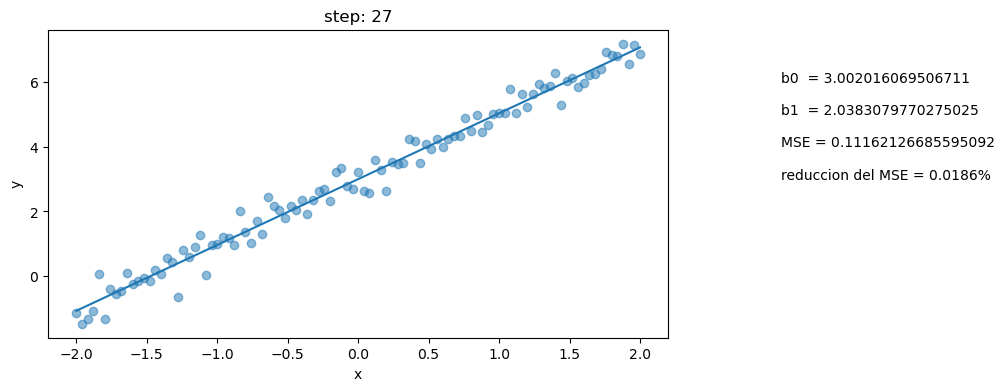

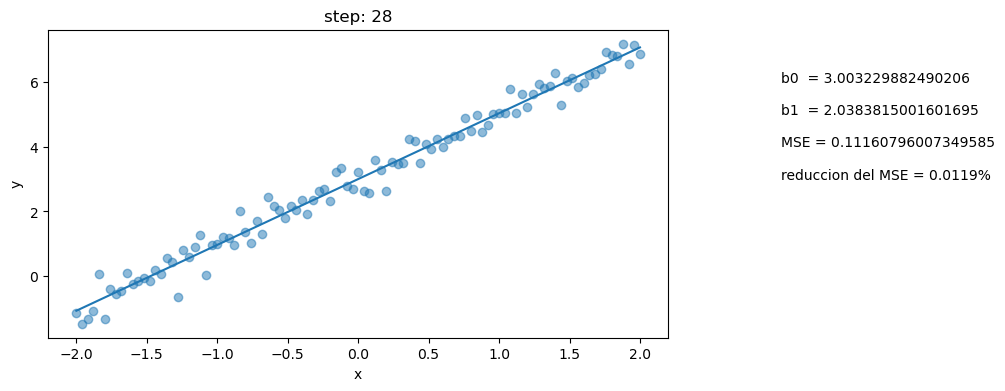

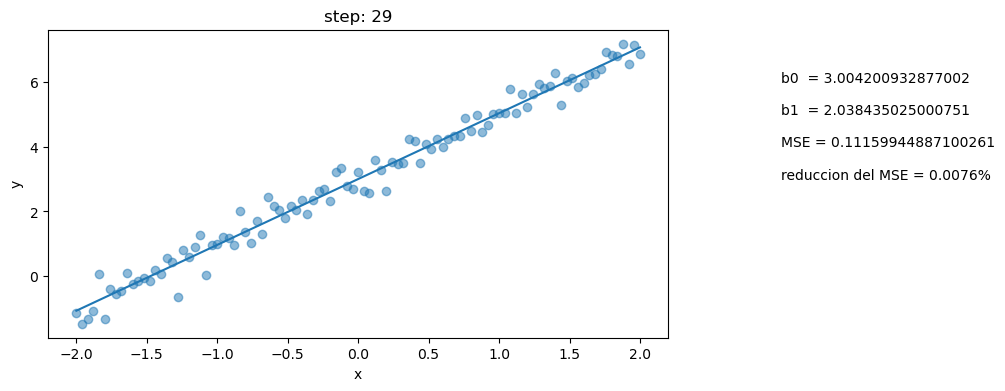

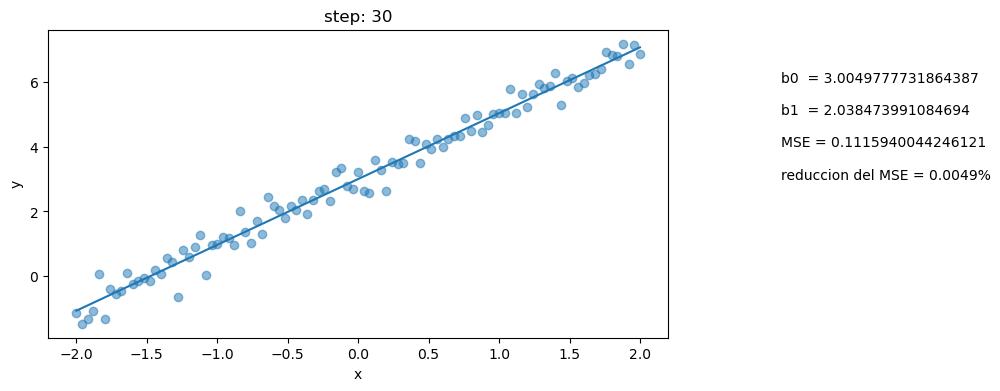

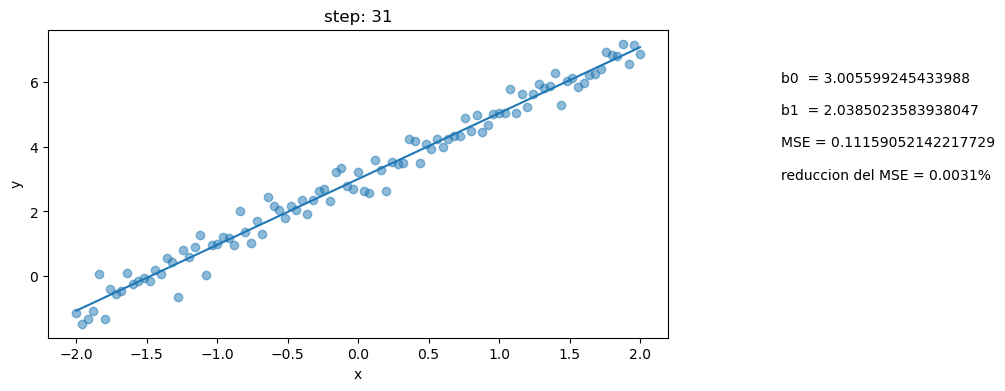

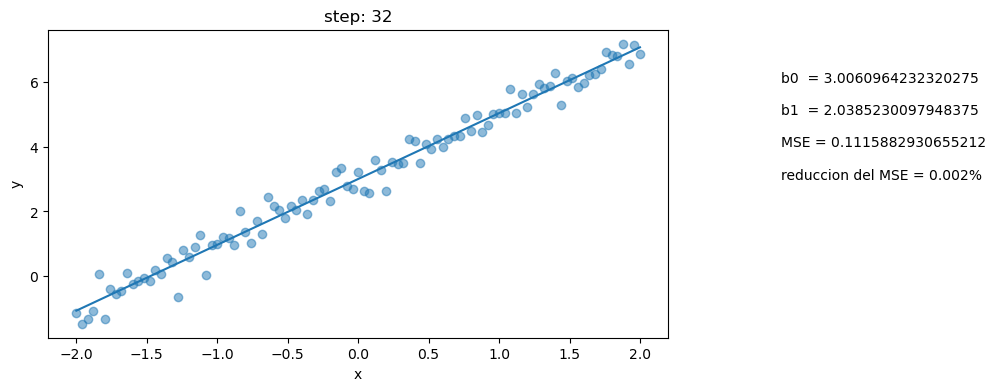

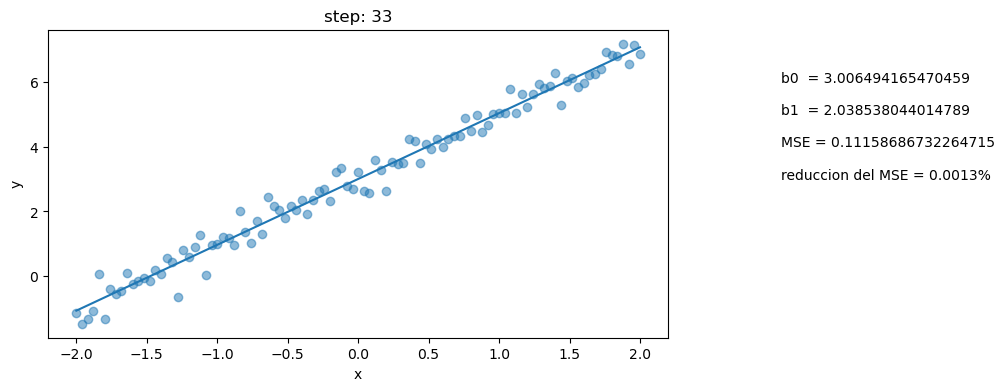

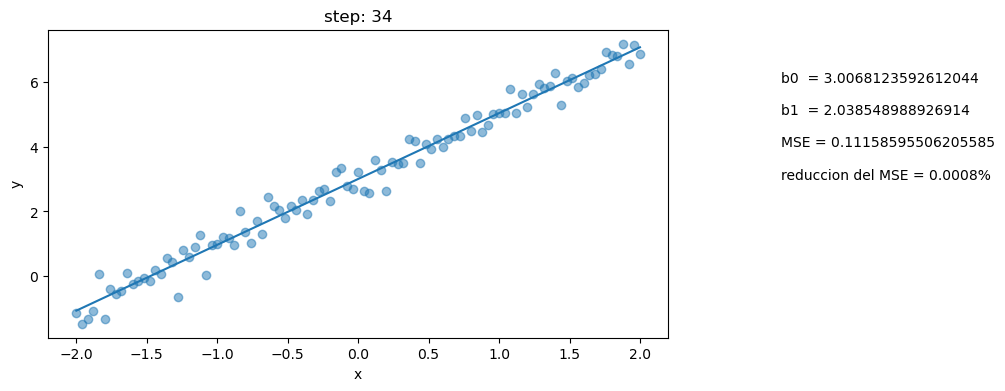

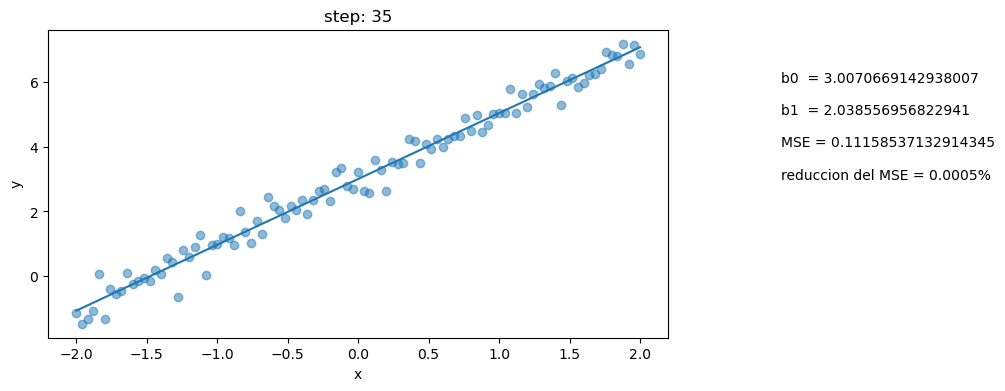

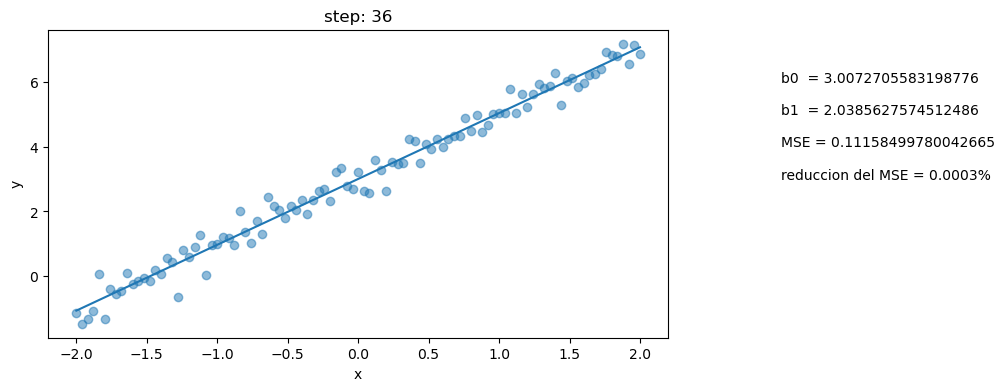

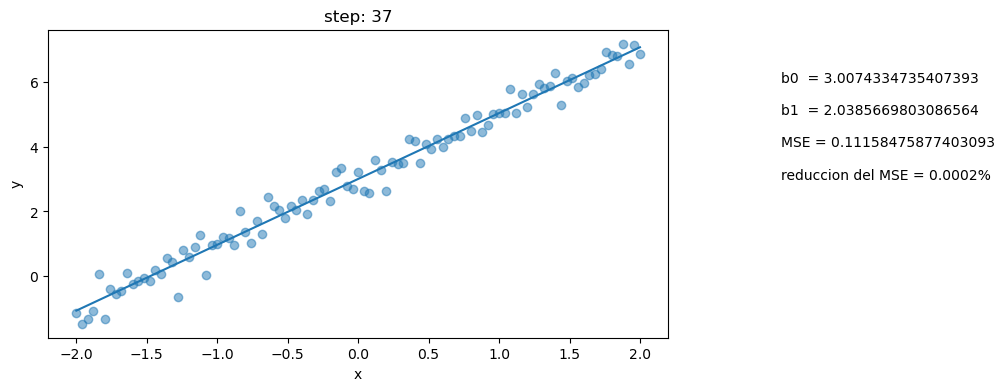

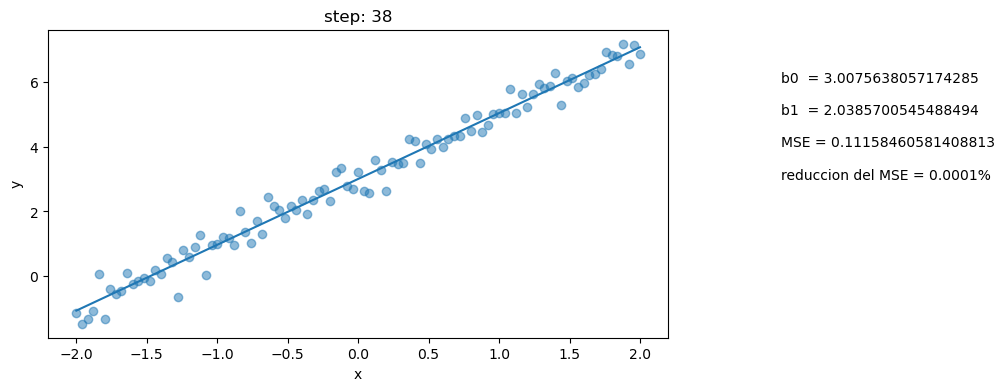

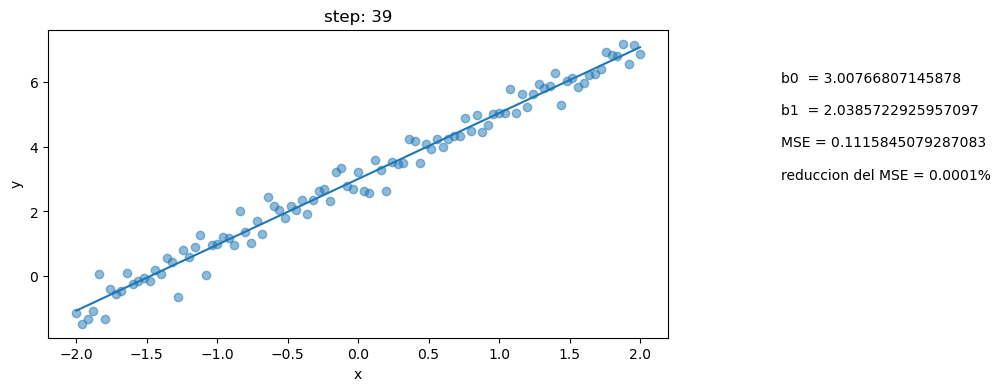

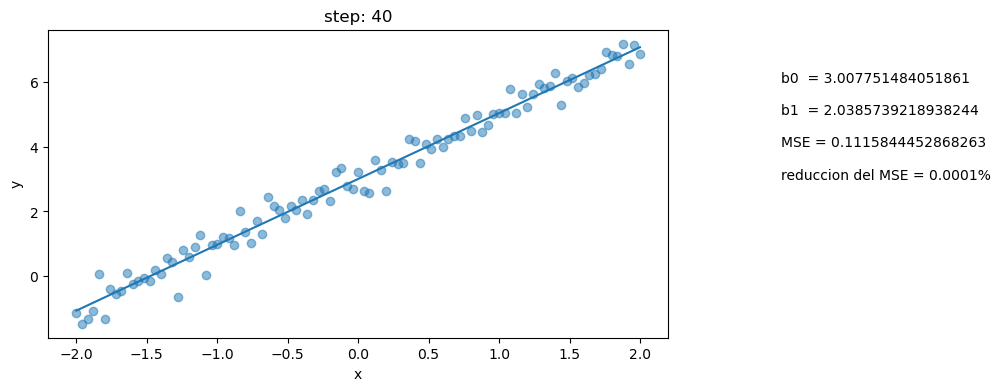

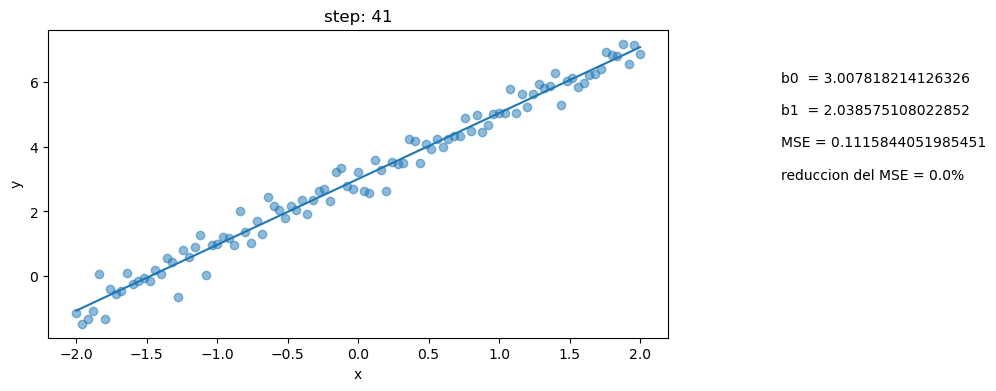

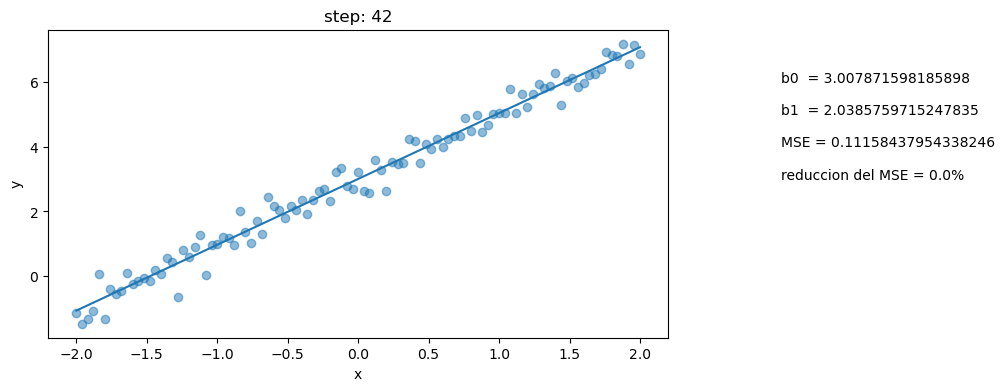

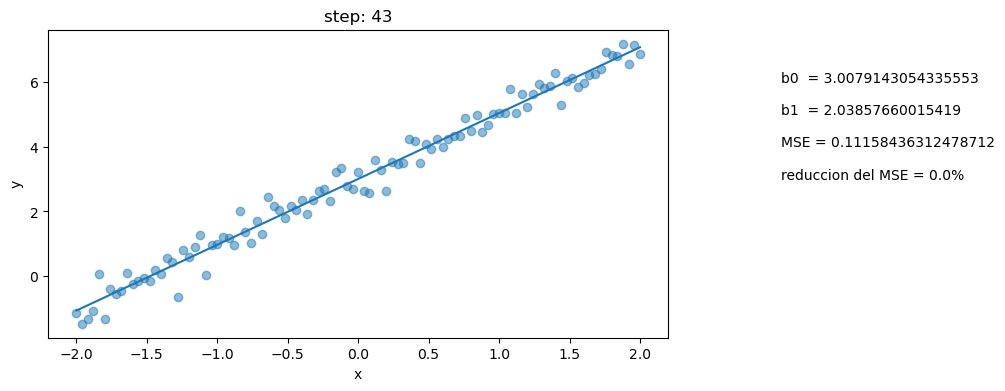

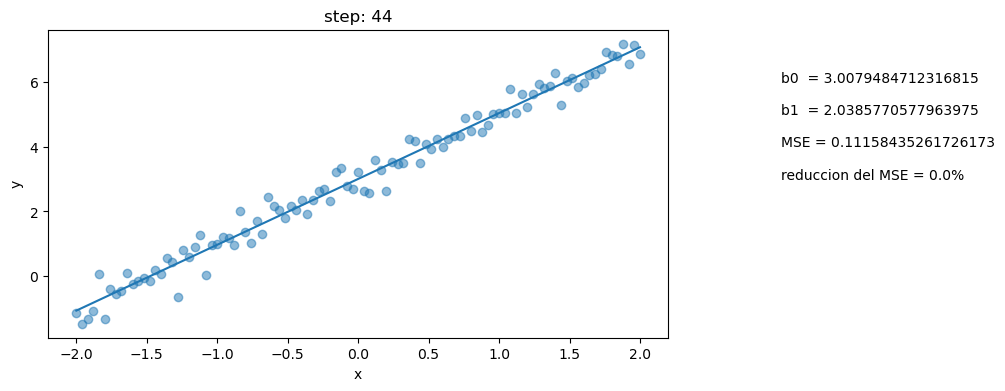

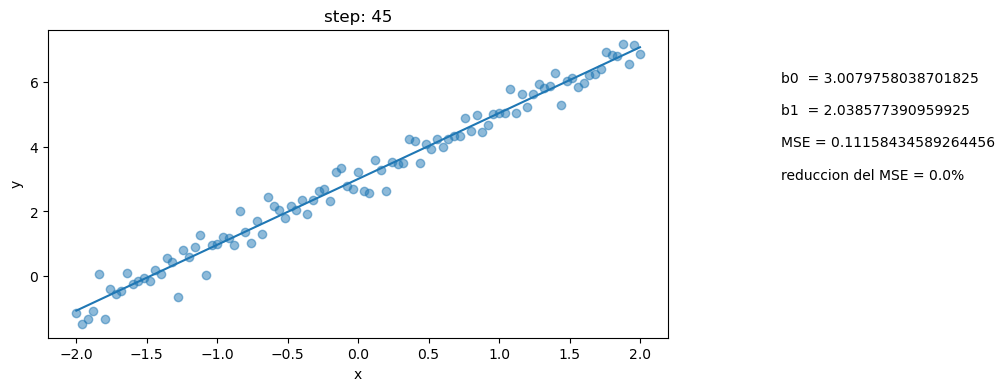

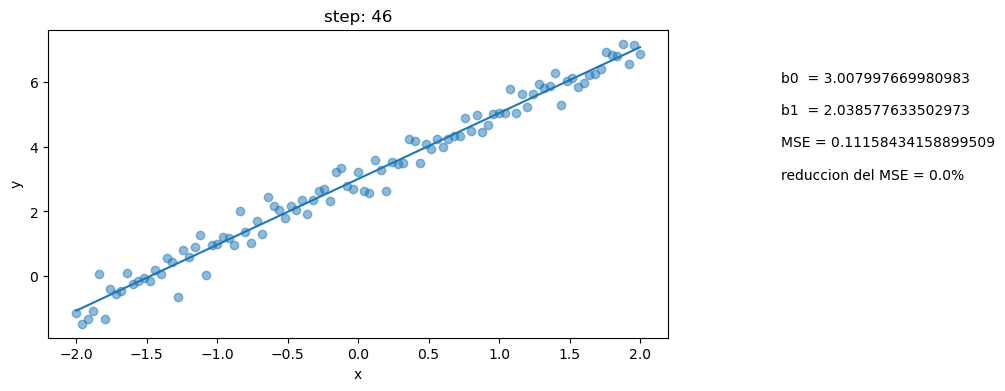

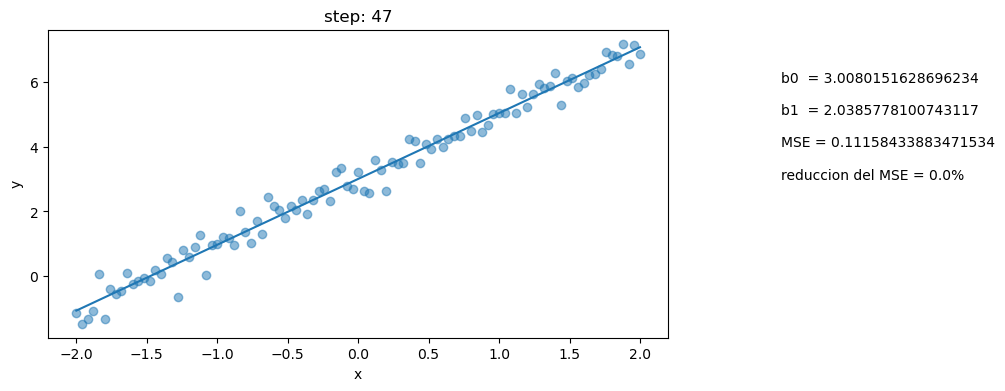

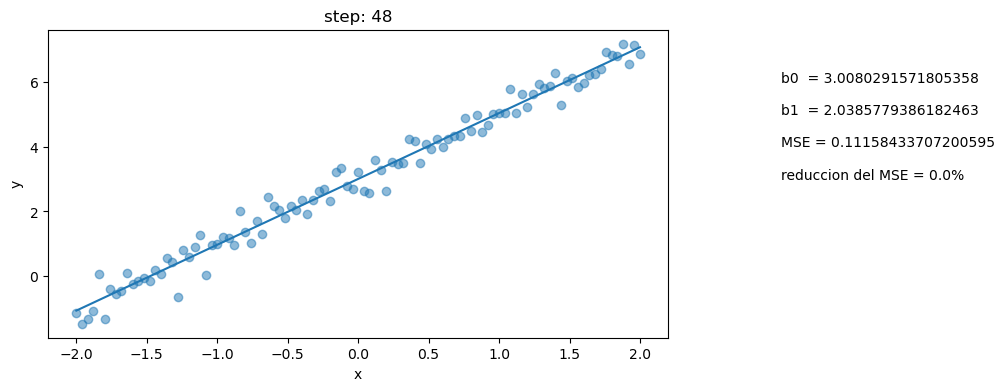

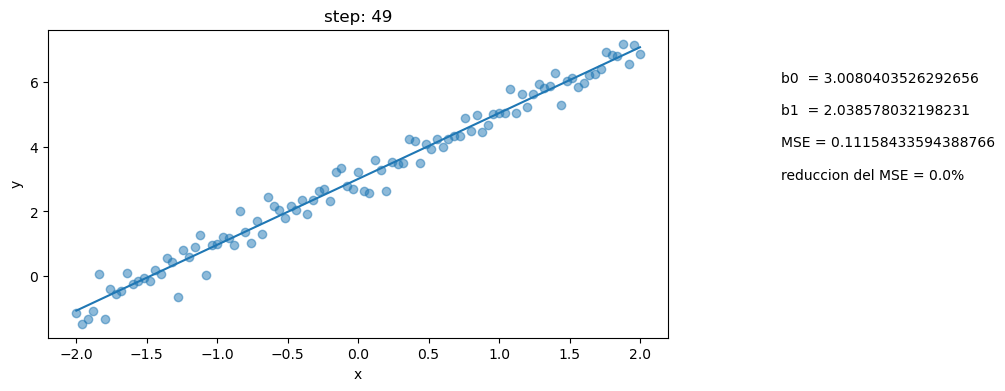

In [4]:
descenso_del_gradiente(X,y)

### Preguntas:


1) Indicar en qué lineas de código se inicializa los parámetros b0 y b1.  
Explicar brevemente por qué se se debe inicializar estos parámetros.  
Se pueden inicializar como b0 = 0 y b1 = 0?

 b_0 = 1
 b_1 = 1
 
 Se deben inicializar para darle un punto desde donde partir al algoritmo, y a partir de ahi, ir reduciendo el valor de la funcion de coste
 
 Si, pueden inicializarse en cualquier valor.

2) Indicar donde se define la velocidad de aprendizaje del algoritmo (α) y cual es su valor por defecto 


def descenso_del_gradiente(X,y,num_steps = 100,**learningRate = 0.10**,criteria = 1e-5):

su valor por defecto es 0.1 y se lo define al llamar a la funcion descenso_del_gradiente

descenso_del_gradiente(X, y, learningrate = )

3) Qué define el parámetro de la funcion criteria?


if max(abs(learningRate * b_0_gradient), abs(learningRate * b_1_gradient)) < criteria:
            break
            
Este parametro, define un valor minimo de "paso", del algoritmo, cuando el paso generado por el lr y el gradiente, es demasiado pequeño, el algoritmo corta

4) En que lineas del código se calculan los valores de las derivadas parciales?

b_0_gradient -= (2.0/N) * (y[i] - (b_0 + b_1 * X[i]))

b_1_gradient -= (2.0/N) * (y[i] - (b_0 + b_1 * X[i])) * X[i]

5) En que lineas del código se actualiza el valor de b0 y b1 ?  


6) Qué observación pueden ver respecto de la velocidad de aprendizaje del modelo?

Se observa que a medida que el modelo comienza a aproximar a la recta que minimiza el MSE, entonces el gradiente es menor y por ende el aprendizaje es mas pequeño